## Load Libraries

In [59]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

## Read file

In [60]:
df=pd.read_csv("Fish_dataset.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


## Displaying dataframes
##### In this process we find Head/Tail/Size/shape and info of the dataset.
-- By finding info() it offers insights into the data types and helps identify potential issues such as missing values.

In [61]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [62]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [63]:
df.size

1113

In [64]:
df.shape

(159, 7)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


## Descrbing Dataset
* The describe()is used to generate descriptive statistics of a Dataset.It provides a summary of central tendency, dispersion, and skewness of data.
* It provides information such as mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values for each column in the DataFrame.

In [66]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


## Visualisation
* barplot --- are used to compare different categories or groups.
* Histplot ---- represents how the values in a dataset are distributed across different ranges.
It helps you understand the central tendency, spread, and shape of the data distribution.

Text(0.5, 1.0, 'Types of Species')

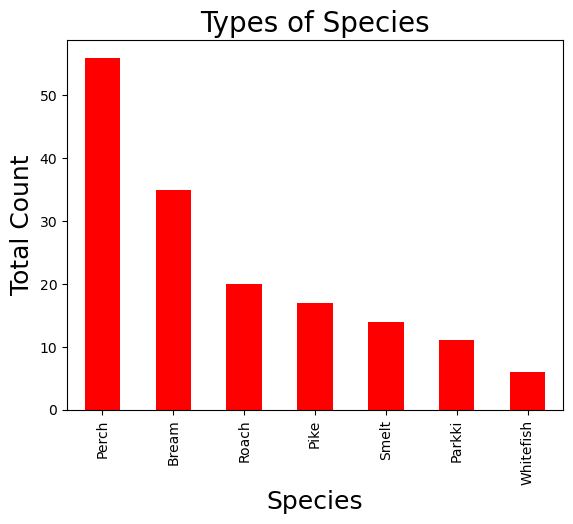

In [67]:
s_count=df["Species"].value_counts()
s_count.plot(kind="bar",color="red")
plt.xlabel("Species", fontsize=18)
plt.ylabel("Total Count",fontsize=18)
plt.title("Types of Species",fontsize=20)

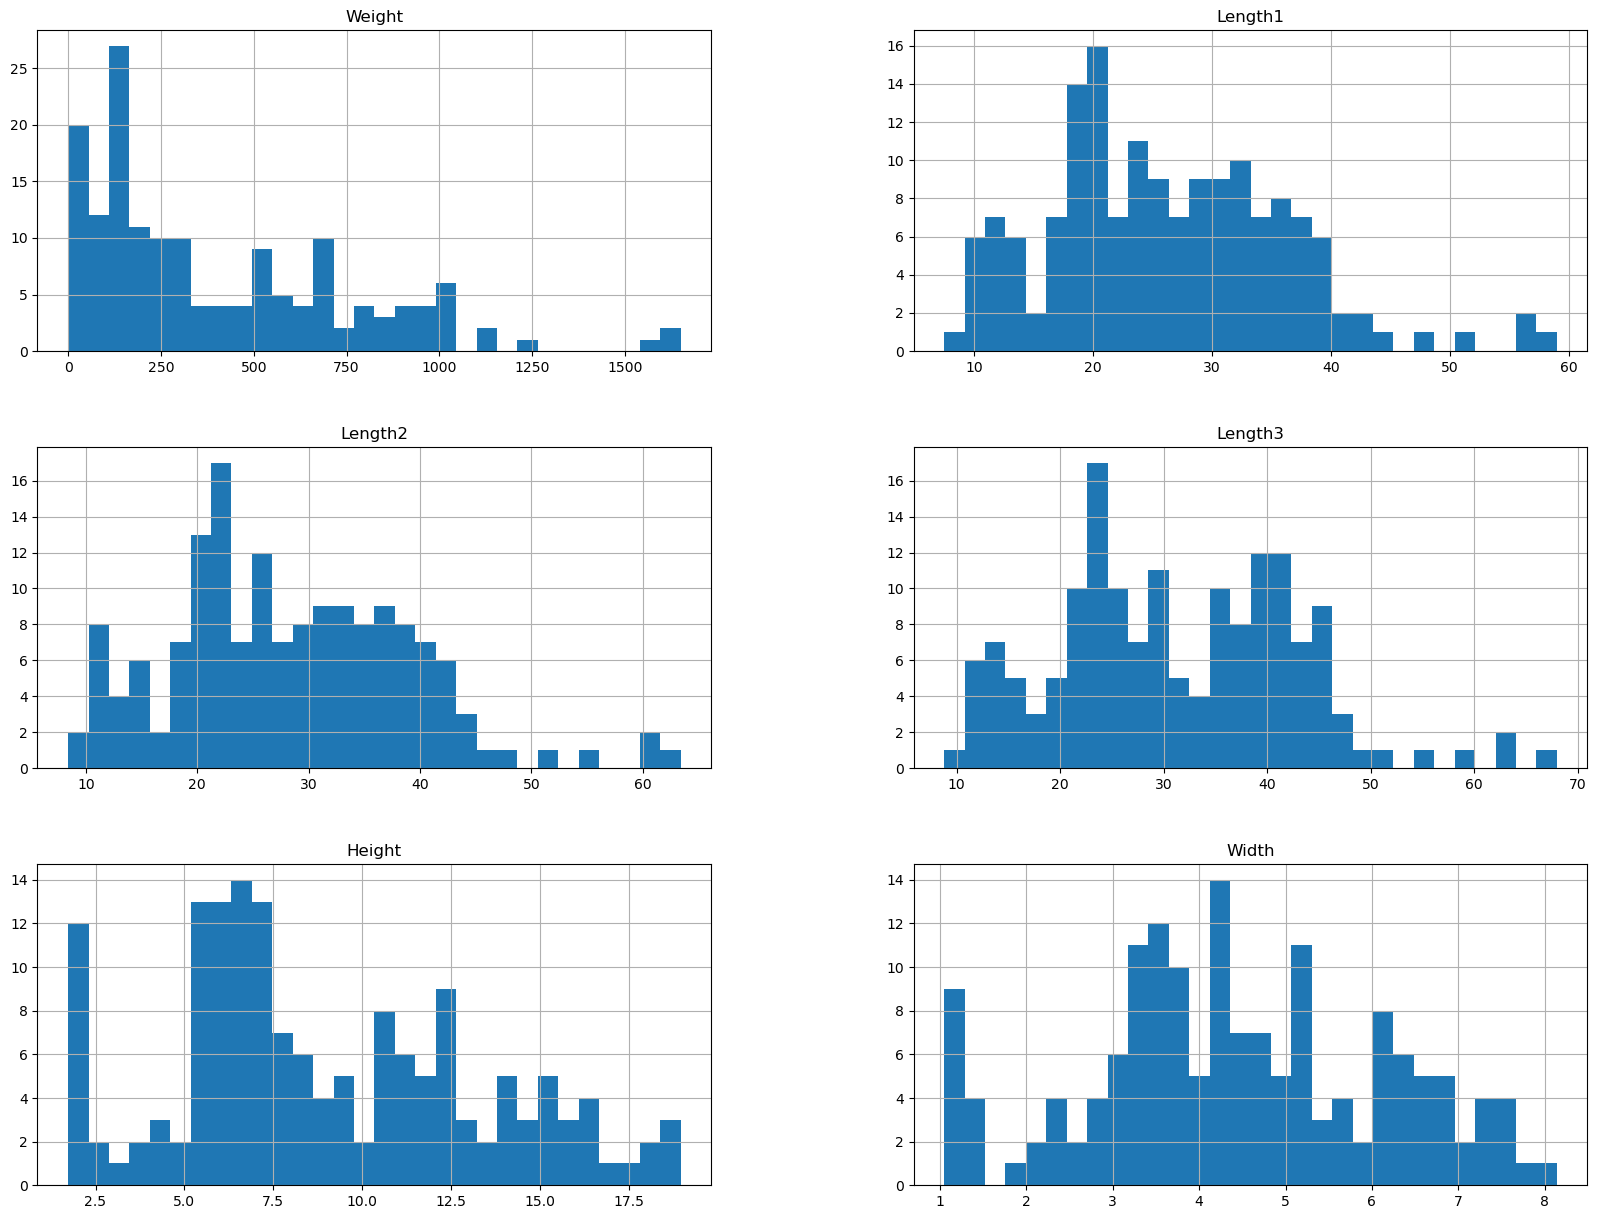

In [68]:
df.hist(bins=30, figsize=(20,15))
plt.show()

## Missing Values
* There is no missing values in fish dataset

In [69]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

## Outliers
1. i have choose one column
2. then i have found lower and upper outliers
   
        * lower_outliers=Q1-1.5*(IQR)
        * upper_outlier = Q3+1.5*(IQR)
4. with the help of box plox i have checked whether the outliers has been removed or not
5. with the help of IQR Method i have removed outliers of all the columns
   
         * IQR=Q3-Q1

In [116]:
from scipy import stats

Q1=df['Weight'].quantile(q=0.25)
Q3=df['Weight'].quantile(q=0.75)
IQR=Q3-Q1
    
print('1st quartile = {} \n3rd quartile range = {} \ninter quartile range ={}'.format(Q1,Q3,stats.iqr(df['Weight'])))

1st quartile = 120.0 
3rd quartile range = 650.0 
inter quartile range =530.0


In [117]:
lower_outlier = Q1-1.5*(IQR)
upper_outlier = Q3+1.5*(IQR)

print('lower outlier = ', lower_outlier)
print('upper outlier = ', upper_outlier)

lower outlier =  -675.0
upper outlier =  1445.0


In [119]:
print('Number of upper outlier = ', 
      df[df['Weight']>upper_outlier]['Weight'].count())
print('Number of lower outlier = ', 
      df[df['Weight']<lower_outlier]['Weight'].count())

Number of upper outlier =  3
Number of lower outlier =  0


In [122]:
df.loc[(df['Weight']<lower_outlier) | (df['Weight']>upper_outlier),
['Weight']] = df['Weight'].median()

In [124]:
print('Number of upper outlier = ',df[df['Weight']>upper_outlier]['Weight'].count())
print('Number of lower outlier = ',df[df['Weight']<lower_outlier]['Weight'].count())

Number of upper outlier =  0
Number of lower outlier =  0


<Axes: xlabel='Weight'>

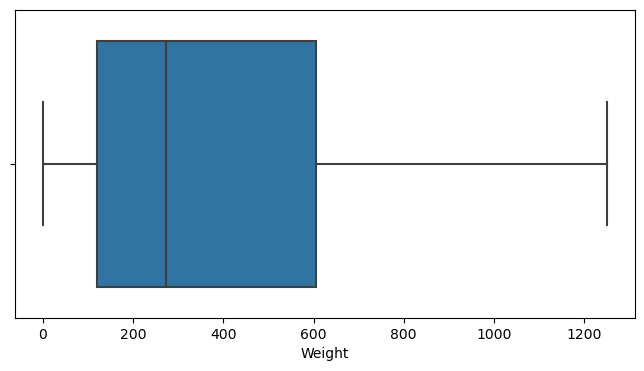

In [126]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.boxplot(x='Weight', data=df,)

In [128]:
for cols in df.columns[:-1]:
    if df[cols].dtype==object:
        continue
    else:
        Q1=df[cols].quantile(q=0.25)
        Q3=df[cols].quantile(q=0.75)
        IQR=Q3-Q1
    
        low=Q1-1.5*(IQR)
        high=Q3+1.5*(IQR)
        df.loc[(df[cols]<low)|(df[cols]>high),cols] = df[cols].median()

<Axes: >

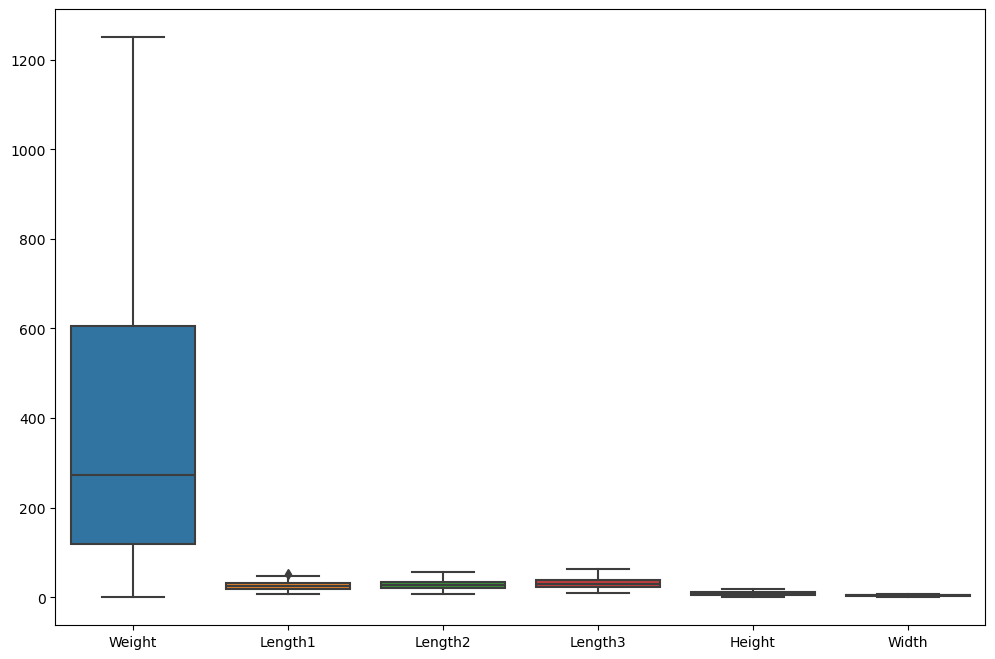

In [129]:
plt.figure(figsize=(12,8))
sns.boxplot(df)

## Standardization 

In [73]:
df=df.drop(columns="Species")

In [74]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x=df.drop("Weight",axis=1)
y=df["Weight"]

In [78]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [79]:
X_train.shape

(111, 5)

## Simple Regression

In [80]:
X= df['Length3'].values.reshape(-1,1)

In [81]:
y= df['Weight'].values

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
model2=LinearRegression()

In [86]:
model2.fit(X_train,y_train)

LinearRegression()

In [87]:
model2.coef_

array([28.79719013])

In [88]:
model2.intercept_

-500.22200263284213

In [89]:
y_pred=model2.predict(X_test)
y_pred

array([ 1.39075618e+02,  6.89101950e+02,  1.08650317e+03,  4.99040495e+02,
        6.02710379e+02,  3.80972015e+02,  5.01920214e+02,  8.49105555e-01,
       -3.37075226e+01,  1.76511965e+02,  3.46415387e+02,  1.56353932e+02,
        5.88311784e+02,  6.97741107e+02,  2.19707751e+02,  6.68943916e+02,
       -1.43136845e+02, -1.89212349e+02,  5.42236280e+02,  5.07679652e+02,
        1.21897025e+03,  7.23658578e+02,  3.32016792e+02,  1.34279817e+03,
       -1.66174597e+02, -4.91033247e+00,  6.22868412e+02,  3.26257354e+02,
        8.41727057e+02, -1.20099093e+02,  8.10050148e+02,  6.11349536e+02])

In [90]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse
MAE= mean_absolute_error(y_test,y_pred)
MSE= mean_squared_error(y_test,y_pred)
r2 =r2_score(y_test,y_pred)
RMSE= rmse(y_test,y_pred)

print("MAE=",MAE,"\nMSE=",MSE,"\nr2=",r2,"\nRMSE=",RMSE) 

MAE= 118.34605993943912 
MSE= 21163.95102242363 
r2= 0.8688213905029951 
RMSE= 145.4783524185768


In [91]:
y_pre=model2.predict(X_train)

In [92]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse
MAE= mean_absolute_error(y_train,y_pre)
MSE= mean_squared_error(y_train,y_pre)
r2 =r2_score(y_train,y_pre)
RMSE= rmse(y_train,y_pre)

print("MAE=",MAE,"\nMSE=",MSE,"\nr2=",r2,"\nRMSE=",RMSE)

MAE= 102.28335294791651 
MSE= 18280.98047460456 
r2= 0.8455889932745347 
RMSE= 135.20717612096098


In [93]:
df.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

## Multiple Regression

In [94]:
X=df[[ 'Length1', 'Length2', 'Length3', 'Height', 'Width']].values

In [95]:
y= df['Weight'].values

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
model4=LinearRegression()

In [100]:
model4.fit(X_train,y_train)

LinearRegression()

In [101]:
model4.coef_

array([ 63.81694501, -10.75828422, -28.61681838,  27.58208889,
        41.20869372])

In [102]:
model4.intercept_

-509.4756051185871

In [103]:
y_pred=model4.predict(X_test)
y_pred

array([  89.42407787,  870.59971093,  940.40318415,  466.52820514,
        747.37885096,  352.83686151,  354.3560225 ,   15.19873723,
        -93.67152345,  174.63662747,  389.76941001,  146.7526642 ,
        394.80294868,  727.24073006,  190.87997433,  660.81078991,
       -191.88487357, -239.34087675,  547.43168929,  512.78668736,
       1080.70664269,  791.92710368,  364.92196548, 1105.27415309,
       -215.92042022,   16.39787283,  734.54441702,  424.97471031,
        963.97277978, -180.67782473,  662.83206508,  640.20427201])

In [104]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse
MAE= mean_absolute_error(y_test,y_pred)
MSE= mean_squared_error(y_test,y_pred)
r2 =r2_score(y_test,y_pred)
RMSE= rmse(y_test,y_pred)

print("MAE=",MAE,"\nMSE=",MSE,"\nr2=",r2,"\nRMSE=",RMSE) 

MAE= 109.06327142039422 
MSE= 21303.013279012113 
r2= 0.8679594534557271 
RMSE= 145.9555181519771


In [105]:
y_pre=model4.predict(X_train)

In [106]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse
MAE= mean_absolute_error(y_train,y_pre)
MSE= mean_squared_error(y_train,y_pre)
r2 =r2_score(y_train,y_pre)
RMSE= rmse(y_train,y_pre)

print("MAE=",MAE,"\nMSE=",MSE,"\nr2=",r2,"\nRMSE=",RMSE)

MAE= 86.13313427475353 
MSE= 13170.813293486499 
r2= 0.8887522174827779 
RMSE= 114.76416380336894


### Using Lasso(L1 reguilarized) Regression Model

In [107]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
y_predict_lasso_train =lasso_reg.predict(X_train)
y_predict_lasso_test =lasso_reg.predict(X_test)

In [108]:
print(lasso_reg.score(X_test,y_test))
print(lasso_reg.score(X_train,y_train))

0.8690935110940596
0.8885549775969757


### Using Ridge(L1 reguilarized) Regression Model

In [109]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
y_predict_ridge_train =lasso_reg.predict(X_train)
y_predict_ridge_test =lasso_reg.predict(X_test)

In [110]:
print(ridge_reg.score(X_test,y_test))
print(ridge_reg.score(X_train,y_train))

0.8684366673973545
0.8887150381090348


### Using elastic(reguilarized) Regression Model

In [111]:
from sklearn.linear_model import ElasticNet
en_reg = ElasticNet()
en_reg.fit(X_train, y_train)
y_predict_en_train = en_reg.predict(X_train)
y_predict_en_test = en_reg.predict(X_test)

In [112]:
print(en_reg.score(X_test,y_test))
print(en_reg.score(X_train,y_train))

0.8776328958397241
0.8837781439066739
